# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [39]:
# Load pickled data
import pickle
import csv

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

def load_sign_names():
    sign_names = {};
    with open('signnames.csv', newline='') as csvfile:
        sign_names_reader = csv.reader(csvfile, delimiter=',')
        for row in sign_names_reader: 
            sign_names[row[0]] = row[1]
            
    
    return sign_names

sign_names = load_sign_names()
print (sign_names)
X_train_color, y_train = train['features'], train['labels']
X_valid_color, y_valid = valid['features'], valid['labels']
X_test_color, y_test = test['features'], test['labels']

print ("Done loading data")

{'29': 'Bicycles crossing', '37': 'Go straight or left', '15': 'No vehicles', '4': 'Speed limit (70km/h)', '17': 'No entry', '19': 'Dangerous curve to the left', '38': 'Keep right', '0': 'Speed limit (20km/h)', '34': 'Turn left ahead', '31': 'Wild animals crossing', '24': 'Road narrows on the right', '7': 'Speed limit (100km/h)', '36': 'Go straight or right', '23': 'Slippery road', '20': 'Dangerous curve to the right', '40': 'Roundabout mandatory', '3': 'Speed limit (60km/h)', '41': 'End of no passing', '28': 'Children crossing', '35': 'Ahead only', '12': 'Priority road', '6': 'End of speed limit (80km/h)', '26': 'Traffic signals', '11': 'Right-of-way at the next intersection', '42': 'End of no passing by vehicles over 3.5 metric tons', '32': 'End of all speed and passing limits', '9': 'No passing', '22': 'Bumpy road', '13': 'Yield', '2': 'Speed limit (50km/h)', '30': 'Beware of ice/snow', '5': 'Speed limit (80km/h)', '39': 'Keep left', '10': 'No passing for vehicles over 3.5 metric to

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

n_train = len(X_train_color)

n_test = len(X_test_color)

n_validation = len(X_valid_color)

image_shape = X_train_color[0].shape

n_classes = np.max(y_test) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

23036   13
31459   2
28604   12


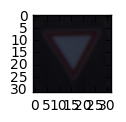

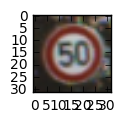

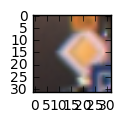

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_random(data, n, label, gray):
    for i in range(n):
        index = random.randint(0, len(data))
        image = data[index].squeeze()

        plt.figure(figsize=(1,1))
        if gray == True: 
            plt.imshow(image, cmap='gray')
        else: 
            plt.imshow(image)
        print (index, ' ' , y_train[index])

display_random(X_train_color, 3, y_train, False)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Finished processing train set
Finished processing test set
Finished processing validation set
4666   22
33037   2
13849   5


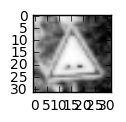

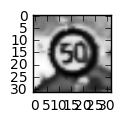

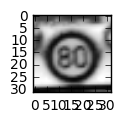

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import cv2
import numpy as np

"copy/inspired from campushippo build a tensor flow traffic sign classifier at 95%"
def preprocess(data):
    images = np.ndarray((data.shape[0], 32, 32, 1), dtype = np.uint8)
    for i, image in enumerate(data):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.equalizeHist(image)
        image = np.expand_dims(image, axis = 2)
        images[i] = image
        
    return images

X_train = preprocess(X_train_color) #store in another set otherwise would not be able to rerun color to gray conversion
print ('Finished processing train set')
X_test = preprocess(X_test_color)
print ('Finished processing test set')
X_valid = preprocess(X_valid_color)
print ('Finished processing validation set')

display_random(X_train, 3, y_train, True) #display random data to verify conversion is successful




### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten 

EPOCHS = 20 
BATCH_SIZE = 128

#"copy" Lenet solution 

def LeNet(x):
    #arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    kernel_size = 5
    #Layer 1: Convolutional. Input = 32x32x1 * (kernel =5 ) -> Output = 28 x 28 x 6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(kernel_size, kernel_size, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding='VALID') + conv1_b
    
    #Activation with Relu function
    conv1 = tf.nn.relu(conv1)
    
    #Pooling/subsampling layer1 Input = 28x28x6 -> output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 2: convolutional. Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation layer 2
    conv2 = tf.nn.relu(conv2)
    
    #Pooling/Subsampling layer 2
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 1, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #flatten (5x5x16) -> 400
    fc0 = flatten(conv2)
    
    #layer 3: fully connected. Input = 400 -> output = 120; TODO: check what does it mean by fully connected neural network
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    #activation 
    fc1 = tf.nn.relu(fc1)
    
    #layer 4: fully connected Input = 120 -> output = 84?
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
        
    fc2 = tf.nn.relu(fc2)
    
    #layer 5: fully connected. Input = 84. Output = n_classes (43)
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y , n_classes)

print ("DONE defining model")



DONE defining model


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

print ("Done training LeNet pipeline")

#model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data): 
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
                
    num_examples = len(X_train)
    
    print("Training....")
    
    for i in range(EPOCHS): 
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print ("Test accuracy = {:.3f}".format(test_accuracy))



Done training LeNet pipeline
Training....
EPOCH 1 ...
Validation accuracy = 0.647

EPOCH 2 ...
Validation accuracy = 0.778

EPOCH 3 ...
Validation accuracy = 0.804

EPOCH 4 ...
Validation accuracy = 0.841

EPOCH 5 ...
Validation accuracy = 0.855

EPOCH 6 ...
Validation accuracy = 0.866

EPOCH 7 ...
Validation accuracy = 0.842

EPOCH 8 ...
Validation accuracy = 0.873

EPOCH 9 ...
Validation accuracy = 0.874

EPOCH 10 ...
Validation accuracy = 0.876

EPOCH 11 ...
Validation accuracy = 0.872

EPOCH 12 ...
Validation accuracy = 0.864

EPOCH 13 ...
Validation accuracy = 0.884

EPOCH 14 ...
Validation accuracy = 0.877

EPOCH 15 ...
Validation accuracy = 0.868

EPOCH 16 ...
Validation accuracy = 0.888

EPOCH 17 ...
Validation accuracy = 0.881

EPOCH 18 ...
Validation accuracy = 0.876

EPOCH 19 ...
Validation accuracy = 0.889

EPOCH 20 ...
Validation accuracy = 0.891

Model saved
Test accuracy = 0.875


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Finished loading test image
Test Accuracy = 0.875


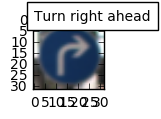

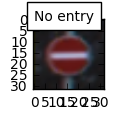

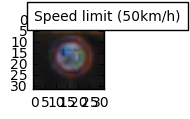

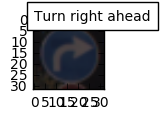

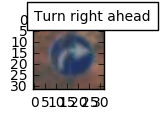

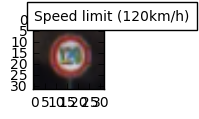

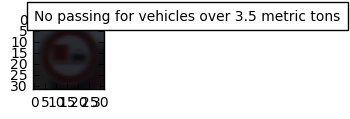

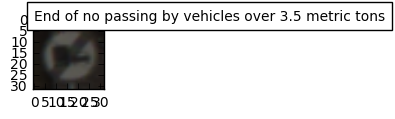

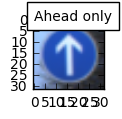

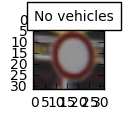

In [56]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#(test data and original idea copied from MWransky, found when googling test data on github)

from skimage import io
import matplotlib.cm as cm
import matplotlib.pylab as plt

num_test_images = 10

test_images_color = np.uint8(np.zeros((num_test_images, 32, 32, 3)))

for i in range(num_test_images):
    image_index = i + 1
    #prediction accurate on input image, but not on test image
    #maybe because of softmax? 
    
    #image = io.imread('testdata/test{}.jpg'.format(str(image_index)))
    index = random.randint(0, len(X_train_color))
    test_images_color[i] = X_train_color[index]

    #plt.figure(figsize=(1,1))
    #plt.imshow(image)

print ("Finished loading test image")

test_images_gray = preprocess(test_images_color)

#for i in range(num_test_images):
#    plt.figure(figsize=(1,1))
#    plt.imshow(test_images_gray[i].squeeze(), cmap='gray')

#TODO: use softmax instead of argmax? 
#predicted_labels = tf.nn.softmax(logits)
predicted_labels = tf.argmax(logits, 1)
#all predictions are wrong
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    predicted = sess.run(predicted_labels, feed_dict = {x: test_images_gray})
    print("Test Accuracy = {:.3f}".format(test_accuracy))

    for i in range(num_test_images):
        prediction = sign_names[str(predicted[i])]
        fig = plt.figure(figsize=(2, 2))
        ax = fig.add_subplot(2,2,1)
        #fig, ax = plt.subplots(1)
        ax.imshow(test_images_color[i].squeeze(), cmap='gray')
        ax.text(0, 0, prediction, bbox={'facecolor':'white', 'pad':5})

    plt.show()



### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.



### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 